# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    if np.all(arr):
        return None
    
    aux_arr = arr == 0
    return arr[1:][aux_arr[:-1]].max()

Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def nearest_value(X, v):
    Y = np.absolute(X - v)
    return X.flatten()[Y.argmin()]

Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
def scale(X):
    means = np.mean(X, 0)
    stds = np.std(X, 0)
    stds[stds == 0] = 1#страховка от деления на 0
    X = (X - means) / stds
    return X
    
X = np.random.rand(3,3)
print('Original matrix: \n{}\n'.format(X))
print('Scaled matrix: \n{}'.format(scale(X)))

Original matrix: 
[[0.55658431 0.43140644 0.29912956]
 [0.86602038 0.60909922 0.72807291]
 [0.6491878  0.5448298  0.2776423 ]]

Scaled matrix: 
[[-1.03344747 -1.32093548 -0.65468683]
 [ 1.3527798   1.09790013  1.41294871]
 [-0.31933234  0.22303534 -0.75826189]]


 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [5]:
def get_stats(X):
    print('Матрица: \n{}\n'.format(X))
    print('Определитель: {}\n'.format(np.linalg.det(X)))
    print('След: {}\n'.format(np.trace(X)))
    print('Наименьший элемент: {}\n'.format(X.min()))
    print('Наибольший элемент: {}\n'.format(X.max()))
    print('Норма: {}\n'.format(np.linalg.norm(X)))
    print('Собственные числа: \n{}\n'.format(np.linalg.eig(X)))
    print('Обратная матрица: {}\n'.format(np.linalg.inv(X)))
    
    
X = np.random.normal(10, 1, (3, 3))

get_stats(X)

Матрица: 
[[10.43618085  9.69368209  9.5998587 ]
 [ 9.03444244  8.61598252 11.11418243]
 [ 9.60076019  9.72013633  9.48140153]]

Определитель: -21.95787457365969

След: 28.533564900219588

Наименьший элемент: 8.615982521161122

Наибольший элемент: 11.114182429056044

Норма: 29.171434789776892

Собственные числа: 
(array([29.09923522,  0.63071927, -1.19638959]), array([[-0.59013332, -0.79016651,  0.26056719],
       [-0.57031887,  0.56568478, -0.81898246],
       [-0.57138346,  0.23587627,  0.511246  ]]))

Обратная матрица: [[ 1.19955957 -0.0638606  -1.13968847]
 [-0.9584454  -0.30894064  1.33256281]
 [-0.23208212  0.38138407 -0.10661045]]



Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [6]:
Y = np.zeros(100)
for exp_num in range(100):
    X1 = np.random.normal(0, 1, (10, 10))
    X2 = np.random.normal(0, 1, (10, 10))
    Y[exp_num] = (X1 @ X2).max()
    
print('Среднее значение: {}'.format(np.mean(Y)))
print('95 квантиль: {}'.format(np.quantile(Y, 0.95)))

Среднее значение: 8.298513474588729
95 квантиль: 11.223507425133235


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [7]:
import pandas as pd
%matplotlib inline

Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [8]:
data = pd.read_csv('2008.csv')
cancel_codes = { 'A': 'carrier', 'B': 'weather', 'C': "NAS", 'D': 'security'}

most_freq_canc_code = data['CancellationCode'].value_counts()[:1].index[0]
print(cancel_codes[most_freq_canc_code])

carrier


 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [9]:
data = pd.read_csv('2008.csv')

print('Минимальное расстояние: {}'.format(data['Distance'].min()))
print('Среднее расстояние: {}'.format(data['Distance'].mean()))
print('Максимальное расстояние: {}'.format(data['Distance'].max()))      

Минимальное расстояние: 31
Среднее расстояние: 724.5082571428571
Максимальное расстояние: 4962


 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [10]:
pd.set_option('display.max_rows', 100)
data = pd.read_csv('2008.csv')

min_dist_data = data[data['Distance'] == data['Distance'].min()][['Year','Month','DayofMonth', 'DayOfWeek', 'FlightNum', 'Distance']]
print(min_dist_data)
suspicious_flight_nums = min_dist_data['FlightNum'].unique()
data[data['FlightNum'].isin(suspicious_flight_nums)][['Year','Month','DayofMonth', 'DayOfWeek', 'FlightNum', 'Distance']]

       Year  Month  DayofMonth  DayOfWeek  FlightNum  Distance
1116   2008     12          30          2         65        31
6958   2008     12          26          5         65        31
17349  2008      8          18          1         64        31
27534  2008      3          11          2         64        31
46082  2008      8           9          6         65        31
48112  2008      2          28          4         64        31


,Year,Month,DayofMonth,DayOfWeek,FlightNum,Distance
501,2008,3,20,4,64,533
1116,2008,12,30,2,65,31
1389,2008,3,13,4,64,680
1517,2008,7,10,4,65,680
2619,2008,5,23,5,64,2381
3869,2008,7,1,2,64,82
4025,2008,6,15,7,64,1005
4466,2008,6,29,7,64,123
6326,2008,10,18,6,65,82
6778,2008,7,12,6,64,359


Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [11]:
data = pd.read_csv('2008.csv')
airports = pd.read_csv('airports.csv')

most_freq_dep_airport = data['Origin'].value_counts()[:1]
airports[airports['iata'] == most_freq_dep_airport.index[0]][['iata', 'airport', 'city']]


,iata,airport,city
880,ATL,William B Hartsfield-Atlanta Intl,Atlanta


Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [12]:
pd.set_option('display.max_rows', 300)
data = pd.read_csv('2008.csv')

data.groupby('Origin')['AirTime'].mean().sort_values(ascending=False)


Origin
SJU    205.200000
BQN    193.954545
PSE    191.875000
STT    185.029412
ANC    165.415094
JFK    162.600515
SEA    154.622744
STX    153.000000
EWR    142.087444
ADK    142.000000
SWF    139.636364
MIA    139.186161
LGB    138.740260
IAD    137.863346
BOS    137.755989
SFO    132.365230
PHL    132.199203
HPN    129.957447
FLL    129.409938
LAX    129.214703
RSW    127.791339
MCO    127.162879
RFD    127.000000
PBI    124.715278
PDX    124.011925
ISP    122.801887
HNL    121.413858
MDW    119.711825
LAS    116.787571
TPA    116.484472
PHX    116.228044
BDL    115.602837
IAH    115.437003
ACY    113.500000
MSP    111.286526
OGG    111.113402
MHT    110.783133
DEN    110.402216
PVD    109.928251
SNA    107.233333
DFW    105.882936
BWI    105.667650
SAN    105.352128
SRQ    105.213333
LGA    105.205036
AUS    102.662921
ALB    102.347826
ORD     99.937574
IND     99.903756
SAT     99.889401
EYW     99.250000
STL     99.070400
ORF     98.644737
MCI     98.519931
BNA     98.032136
TEX

Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [13]:
data = pd.read_csv('2008.csv')

data = data.groupby('Origin').filter(lambda x: x['Origin'].count() > 1000)
data.loc[data['DepDelay'] > 0, 'DepDelay'] = 1
data.loc[data['DepDelay'] <= 0, 'DepDelay'] = 0
data = data.groupby('Origin')['DepDelay'].agg([('flights_count', 'count'), ('flights_delayed', 'sum'),
                                              ('percent_of_delayed', lambda x: x.sum()/x.count() * 100)])
data.sort_values('percent_of_delayed', ascending=False)

,flights_count,flights_delayed,percent_of_delayed
Origin,,,
EWR,1343,710.0,52.866716
ORD,3391,1649.0,48.628723
IAH,1770,841.0,47.514124
DFW,2730,1283.0,46.996337
BWI,1018,467.0,45.874263
DEN,2353,1063.0,45.176371
SEA,1114,495.0,44.434470
LAS,1773,779.0,43.936830
PHL,1007,432.0,42.899702


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [14]:
import pandas as pd

data = pd.read_csv('2008.csv')

data[data.DepDelay != 0].info()
data[data.DepDelay != 0].isnull().sum()
data[data.DepDelay != 0].isnull().any(axis = 1).sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64803 entries, 0 to 69999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               64803 non-null  int64  
 1   Month              64803 non-null  int64  
 2   DayofMonth         64803 non-null  int64  
 3   DayOfWeek          64803 non-null  int64  
 4   DepTime            63404 non-null  float64
 5   CRSDepTime         64803 non-null  int64  
 6   ArrTime            63264 non-null  float64
 7   CRSArrTime         64803 non-null  int64  
 8   UniqueCarrier      64803 non-null  object 
 9   FlightNum          64803 non-null  int64  
 10  TailNum            63983 non-null  object 
 11  ActualElapsedTime  63240 non-null  float64
 12  CRSElapsedTime     64794 non-null  float64
 13  AirTime            63240 non-null  float64
 14  ArrDelay           63240 non-null  float64
 15  DepDelay           63404 non-null  float64
 16  Origin             648

64803

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [15]:
pd.set_option('display.max_columns', 50)
data = pd.read_csv('2008.csv')

data[data.DepDelay.isnull()]
#Как видно, в объектах, у которых пропуски в поле DepDelay, так же имеются пропуски в поле DepTime 
#это имеет смысл: если не определено время вылета - как может быть определена задержка от этого времени.
data = data[data.DepDelay.notnull() & (data.DepDelay != 0) & data.DepTime.notnull() & (data.DepTime != 0)]
data['DepDelay']

0        16.0
1        16.0
2        -2.0
3        -3.0
4        -5.0
         ... 
69994    -5.0
69995   -11.0
69996    24.0
69998     6.0
69999    -1.0
Name: DepDelay, Length: 63404, dtype: float64

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [16]:
data = data[data.DepDelay.notnull() & data.CRSDepTime.notnull() & data.ArrTime.notnull() & data.CRSArrTime.notnull()]

data.insert(4, 'DepTime_Hour', (data['DepTime'] / 100).astype(int))
data.insert(5, 'DepTime_Minute', (data['DepTime'] % 100).astype(int))
data = data.drop(columns='DepTime')

data.insert(6, 'CRSDepTime_Hour', (data['CRSDepTime'] / 100).astype(int))
data.insert(7, 'CRSDepTime_Minute', (data['CRSDepTime'] % 100).astype(int))
data = data.drop(columns='CRSDepTime')

data.insert(8, 'ArrTime_Hour', (data['ArrTime'] / 100).astype(int))
data.insert(9, 'ArrTime_Minute', (data['ArrTime'] % 100).astype(int))
data = data.drop(columns='ArrTime')

data.insert(10, 'CRSArrTime_Hour', (data['CRSArrTime'] / 100).astype(int))
data.insert(11, 'CRSArrTime_Minute', (data['CRSArrTime'] % 100).astype(int))
data = data.drop(columns='CRSArrTime')

data

,Year,Month,DayofMonth,DayOfWeek,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,21,11,20,55,23,8,23,0,WN,242,N699SW,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,14,26,14,10,17,30,17,28,XE,2380,N15980,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,11,43,11,45,15,1,15,20,WN,1769,N464WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,11,41,11,44,13,23,13,35,OO,3802,N465SW,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,8,15,8,20,12,43,13,0,WN,399,N489WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,9,20,9,25,11,10,11,18,OH,5218,N655CA,110.0,113.0,85.0,-8.0,-5.0,CVG,BDL,661,12.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,18,29,18,40,21,37,21,49,DL,794,N988DL,128.0,129.0,86.0,-12.0,-11.0,ORD,ATL,606,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,11,49,11,25,13,36,13,14,OO,6159,N776SK,47.0,49.0,30.0,22.0,24.0,ORD,GRR,137,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,19,6,19,0,22,0,21,39,NW,641,N318US,234.0,219.0,192.0,21.0,6.0,RSW,MSP,1416,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [17]:
#Исключаем из датасета данные по конкретным причинам задержек, потому что они коррелируют с целевой переменной DepDelay
data = data.drop(columns=['Year', 'TailNum', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])
data

,Month,DayofMonth,DayOfWeek,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,6,18,3,21,11,20,55,23,8,23,0,WN,242,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,0
1,6,4,3,14,26,14,10,17,30,17,28,XE,2380,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,0
2,8,3,7,11,43,11,45,15,1,15,20,WN,1769,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,0
3,1,23,3,11,41,11,44,13,23,13,35,OO,3802,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,0
4,5,4,7,8,15,8,20,12,43,13,0,WN,399,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,9,20,9,25,11,10,11,18,OH,5218,110.0,113.0,85.0,-8.0,-5.0,CVG,BDL,661,12.0,13.0,0,NaN,0
69995,5,12,1,18,29,18,40,21,37,21,49,DL,794,128.0,129.0,86.0,-12.0,-11.0,ORD,ATL,606,22.0,20.0,0,NaN,0
69996,5,11,7,11,49,11,25,13,36,13,14,OO,6159,47.0,49.0,30.0,22.0,24.0,ORD,GRR,137,4.0,13.0,0,NaN,0
69998,2,18,1,19,6,19,0,22,0,21,39,NW,641,234.0,219.0,192.0,21.0,6.0,RSW,MSP,1416,20.0,22.0,0,NaN,0


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

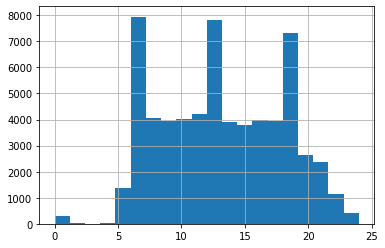

In [18]:
data['DepTime_Hour'].hist(bins=20)

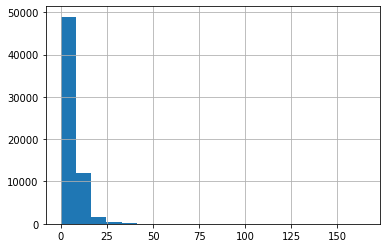

In [19]:
data['TaxiIn'].hist(bins=20)

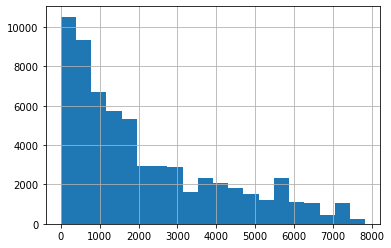

In [20]:
data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [21]:
from sklearn.preprocessing import StandardScaler

def transform_data(data):
    nan = 'nan'
    data['UniqueCarrier'] = data['UniqueCarrier'].fillna(nan, inplace=True)
    data['TailNum'] = data['TailNum'].fillna(nan, inplace=True)
    data['Origin'] = data['Origin'].fillna(nan, inplace=True)
    data['Dest'] = data['Dest'].fillna(nan, inplace=True)
    data['CancellationCode'] = data['CancellationCode'].fillna(nan, inplace=True)
    data.fillna(0, inplace=True)
    
    #вещественные признаки
    col_names = [
        'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut'
    ]
    features = data[col_names]
    scaler = StandardScaler()
    features = scaler.fit_transform(features.values)
    data[col_names] = features
    data = pd.get_dummies(data)
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [22]:
data = pd.read_csv('2008.csv')
data = transform_data(data)
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,0,242,0,-0.930601,-0.912187,-0.805728,0.002552,0.181158,0,0,307,-0.748794,-0.709878,0,0,0,0.0,0.0,0.0,0.0,0.0
1,2008,6,4,3,1426.0,1410,1730.0,1728,0,2380,0,-0.001271,0.135521,0.096865,-0.157504,0.181158,0,0,834,-0.546142,-0.359559,0,0,0,0.0,0.0,0.0,0.0,0.0
2,2008,8,3,7,1143.0,1145,1501.0,1520,0,1769,0,0.192918,0.379508,0.344350,-0.717701,-0.341343,0,0,997,-0.546142,-0.622298,0,0,0,0.0,0.0,0.0,0.0,0.0
3,2008,1,23,3,1141.0,1144,1323.0,1335,0,3802,0,-0.306424,-0.251988,-0.325316,-0.530969,-0.370371,0,0,532,-0.546142,0.253500,0,0,0,0.0,0.0,0.0,0.0,0.0
4,2008,5,4,7,815.0,820,1243.0,1300,0,399,0,0.331624,0.451269,0.504488,-0.664349,-0.428427,0,0,1090,-0.546142,-0.709878,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,0,794,0,0.054212,0.006351,-0.223410,-0.530969,-0.602594,0,0,606,3.101581,0.341079,0,0,0,0.0,0.0,0.0,0.0,0.0
69996,2008,5,11,7,1149.0,1125,1336.0,1314,0,6159,0,-1.069307,-1.141822,-1.038656,0.376017,0.413381,0,0,137,-0.546142,-0.271979,0,0,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,0,7058,0,-0.611577,-0.696905,-0.558243,-0.210856,-0.283287,0,0,368,0.061812,-0.534718,0,0,0,0.0,0.0,0.0,0.0,0.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,0,641,0,1.524496,1.298046,1.319734,0.349341,-0.109120,0,0,1416,2.696279,0.516239,0,0,0,0.0,0.0,15.0,0.0,6.0


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [23]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 1:].values
X_train, X_test = train_test_split(X, test_size=0.3)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [ ]:
# Your code here

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [ ]:
# Your code here

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [ ]:
# Your code here

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [ ]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [ ]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу любимую картинку.